**Navies Bayes:**

**Data Preparartion:**

In [13]:
import pandas as pd
# Load the CSV dataset
df = pd.read_csv("/content/cleaned_merged_data.csv")
# Check if target is usable
df = df.dropna(subset=["DepDel15"])
df["DepDel15"] = df["DepDel15"].astype(int)
#DISPLAY CLEANED DATASET HERE
print("Cleaned Dataset (First 10 Rows):")
print(df.head(10))


Cleaned Dataset (First 10 Rows):
   FlightDate          Airline Origin Dest  Cancelled  Diverted  CRSDepTime  \
0  2019-04-19  JetBlue Airways    BOS  DEN      False     False        1829   
1  2019-04-20  JetBlue Airways    JFK  DEN      False     False        1951   
2  2019-04-20  JetBlue Airways    BOS  DEN      False     False        1829   
3  2019-04-21  JetBlue Airways    JFK  DEN      False     False        1951   
4  2019-04-21  JetBlue Airways    BOS  DEN      False     False         659   
5  2019-04-21  JetBlue Airways    BOS  DEN      False     False        1829   
6  2019-04-22  JetBlue Airways    JFK  DEN      False     False        1951   
7  2019-04-22  JetBlue Airways    BOS  DEN      False     False         659   
8  2019-04-22  JetBlue Airways    BOS  DEN      False     False        1829   
9  2019-04-23  JetBlue Airways    JFK  DEN      False     False        1951   

   DepTime  DepDelayMinutes  DepDelay  ...   T2M_MIN   T2M_MAX      QV2M  \
0   2254.0           

In [14]:
# This will be common to all three models
y = df["DepDel15"]
y.head(10)

,DepDel15
0,1
1,1
2,0
3,1
4,1
5,1
6,0
7,0
8,1
9,0


**Multinomial Naive Bayes:**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Choose categorical columns
multinom_features = ['Airline', 'Origin', 'Dest', 'DepTimeBlk', 'Month', 'DayOfWeek']
X_multinom = df[multinom_features].astype(str)

# Encode text/categorical features as integers
label_encoders = {}
for col in X_multinom.columns:
    le = LabelEncoder()
    X_multinom[col] = le.fit_transform(X_multinom[col])
    label_encoders[col] = le


**Bernoulli Naives Bayes:**

In [4]:
# Select numeric features to binarize
bernoulli_features = ['DepDelayMinutes', 'ArrDelayMinutes', 'Distance']
X_bern = df[bernoulli_features].copy().fillna(df[bernoulli_features].median())

# Convert to binary (1 if above median, else 0)
for col in X_bern.columns:
    X_bern[col] = (X_bern[col] > X_bern[col].median()).astype(int)


**Gaussian Navie Bayes:**

In [5]:
# Use numeric columns directly (after filling missing values)
gauss_features = ['DepDelayMinutes', 'Distance', 'ArrDelayMinutes', 'AirTime', 'TaxiOut', 'TaxiIn']
X_gauss = df[gauss_features].copy().fillna(df[gauss_features].median())


**Train-Test Split:**

In [6]:
from sklearn.model_selection import train_test_split

# Multinomial
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(X_multinom, y, test_size=0.2, random_state=42)

# Bernoulli
X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X_bern, y, test_size=0.2, random_state=42)

# Gaussian
X_train_gn, X_test_gn, y_train_gn, y_test_gn = train_test_split(X_gauss, y, test_size=0.2, random_state=42)


In [7]:
# View the top 5 rows
print("Multinomial NB Features:")
print(X_train_mn.head())

print("\nBernoulli NB Features:")
print(X_train_bn.head())

print("\nGaussian NB Features:")
print(X_train_gn.head())

print("\nSample Target Values:")
print(y_train_mn.head())


Multinomial NB Features:
        Airline  Origin  Dest  DepTimeBlk  Month  DayOfWeek
154306       15      60     0           5      3          6
272581       15      28     0          10      0          2
146735       11      36     0           2      3          0
102246       12      63     0           8     11          2
64063        11       8     0          11     10          1

Bernoulli NB Features:
        DepDelayMinutes  ArrDelayMinutes  Distance
154306                0                0         1
272581                0                0         0
146735                0                1         0
102246                0                0         0
64063                 1                0         0

Gaussian NB Features:
        DepDelayMinutes  Distance  ArrDelayMinutes  AirTime  TaxiOut  TaxiIn
154306              0.0    1703.0              0.0    226.0     11.0     4.0
272581              0.0     524.0              0.0     66.0      9.0    11.0
146735              0.0      73

In [8]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**Model Implementation:**

MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     45612
           1       0.27      0.25      0.26     10333

    accuracy                           0.74     55945
   macro avg       0.55      0.55      0.55     55945
weighted avg       0.73      0.74      0.73     55945



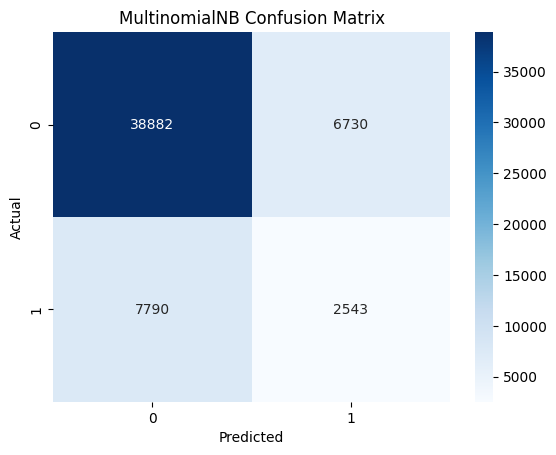

In [9]:
# Train model
model_mn = MultinomialNB()
model_mn.fit(X_train_mn, y_train_mn)

# Predict
y_pred_mn = model_mn.predict(X_test_mn)

# Evaluation
print("MultinomialNB Classification Report:\n", classification_report(y_test_mn, y_pred_mn))

# Confusion Matrix
cm_mn = confusion_matrix(y_test_mn, y_pred_mn)
sns.heatmap(cm_mn, annot=True, fmt='d', cmap='Blues')
plt.title("MultinomialNB Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


BernoulliNB Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     45612
           1       0.72      0.96      0.83     10333

    accuracy                           0.93     55945
   macro avg       0.86      0.94      0.89     55945
weighted avg       0.94      0.93      0.93     55945



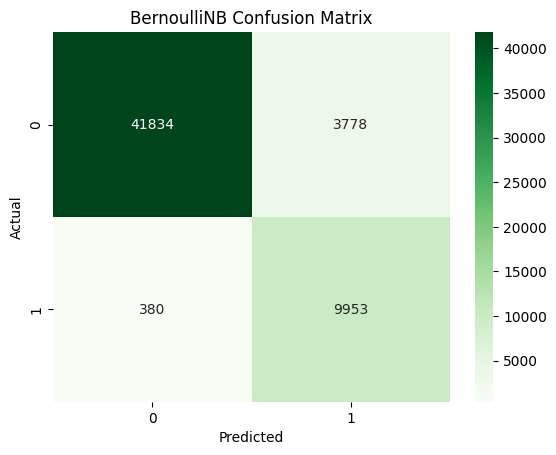

In [10]:
# Train model
model_bn = BernoulliNB()
model_bn.fit(X_train_bn, y_train_bn)

# Predict
y_pred_bn = model_bn.predict(X_test_bn)

# Evaluation
print("BernoulliNB Classification Report:\n", classification_report(y_test_bn, y_pred_bn))

# Confusion Matrix
cm_bn = confusion_matrix(y_test_bn, y_pred_bn)
sns.heatmap(cm_bn, annot=True, fmt='d', cmap='Greens')
plt.title("BernoulliNB Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     45612
           1       0.87      1.00      0.93     10333

    accuracy                           0.97     55945
   macro avg       0.94      0.98      0.96     55945
weighted avg       0.98      0.97      0.97     55945



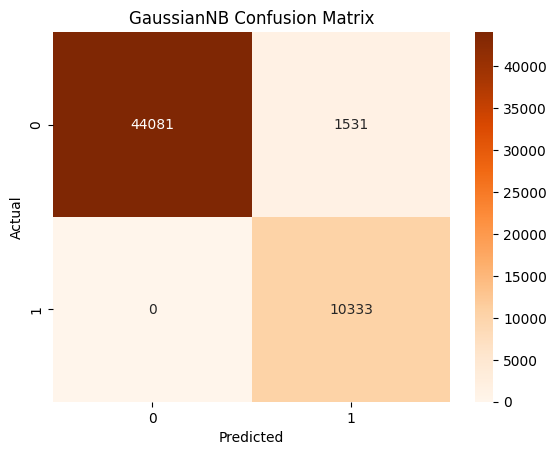

In [11]:
# Train model
model_gn = GaussianNB()
model_gn.fit(X_train_gn, y_train_gn)

# Predict
y_pred_gn = model_gn.predict(X_test_gn)

# Evaluation
print("GaussianNB Classification Report:\n", classification_report(y_test_gn, y_pred_gn))

# Confusion Matrix
cm_gn = confusion_matrix(y_test_gn, y_pred_gn)
sns.heatmap(cm_gn, annot=True, fmt='d', cmap='Oranges')
plt.title("GaussianNB Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
